# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [3]:
unique_class = df_titanic['class'].unique()
unique_class

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [4]:
# Code here
class_values = ['1st', '2nd', '3rd']
df_titanic = df_titanic[df_titanic['class'].map(lambda x: x in class_values)]
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [5]:
joint = pd.crosstab(df_titanic['class'], df_titanic['embarked'], normalize=True)

In [6]:
df_titanic['class'].unique()

array(['3rd', '2nd', '1st'], dtype=object)

## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [7]:
# Code here
# a) the conditional distribution of their class given where they embarked
class_embarked_ct = joint.div(joint.sum(axis=0), axis=1)
class_embarked_ct

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [8]:
# b) the conditional distribution of where they embarked given their class
embarked_class_ct = joint.div(joint.sum(axis=1), axis=0)
embarked_class_ct

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [9]:
# c) What proportion of 3rd class passengers embarked at Southampton?
third_embarked_southampton = embarked_class_ct.loc['3rd', 'S']
third_embarked_southampton


0.6967559943582511

In [10]:
# d) What proportion of Southampton passengers were in 3rd class?
southampton_third_pass = class_embarked_ct.loc['3rd', 'S']
southampton_third_pass

0.5404814004376367

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [11]:
#used chatgpt to get the syntax to transform the rows of my class_embarked ct dataframe to make it easier to plot a bar graph
df_transformed = class_embarked_ct.T.reset_index()
df_transformed.rename(columns={'index': 'embarked'}, inplace=True)
df_transformed

class,embarked,1st,2nd,3rd
0,B,0.333333,0.666667,0.000000
1,C,0.527675,0.095941,0.376384
2,Q,0.024390,0.056911,0.918699
3,S,0.191466,0.268053,0.540481


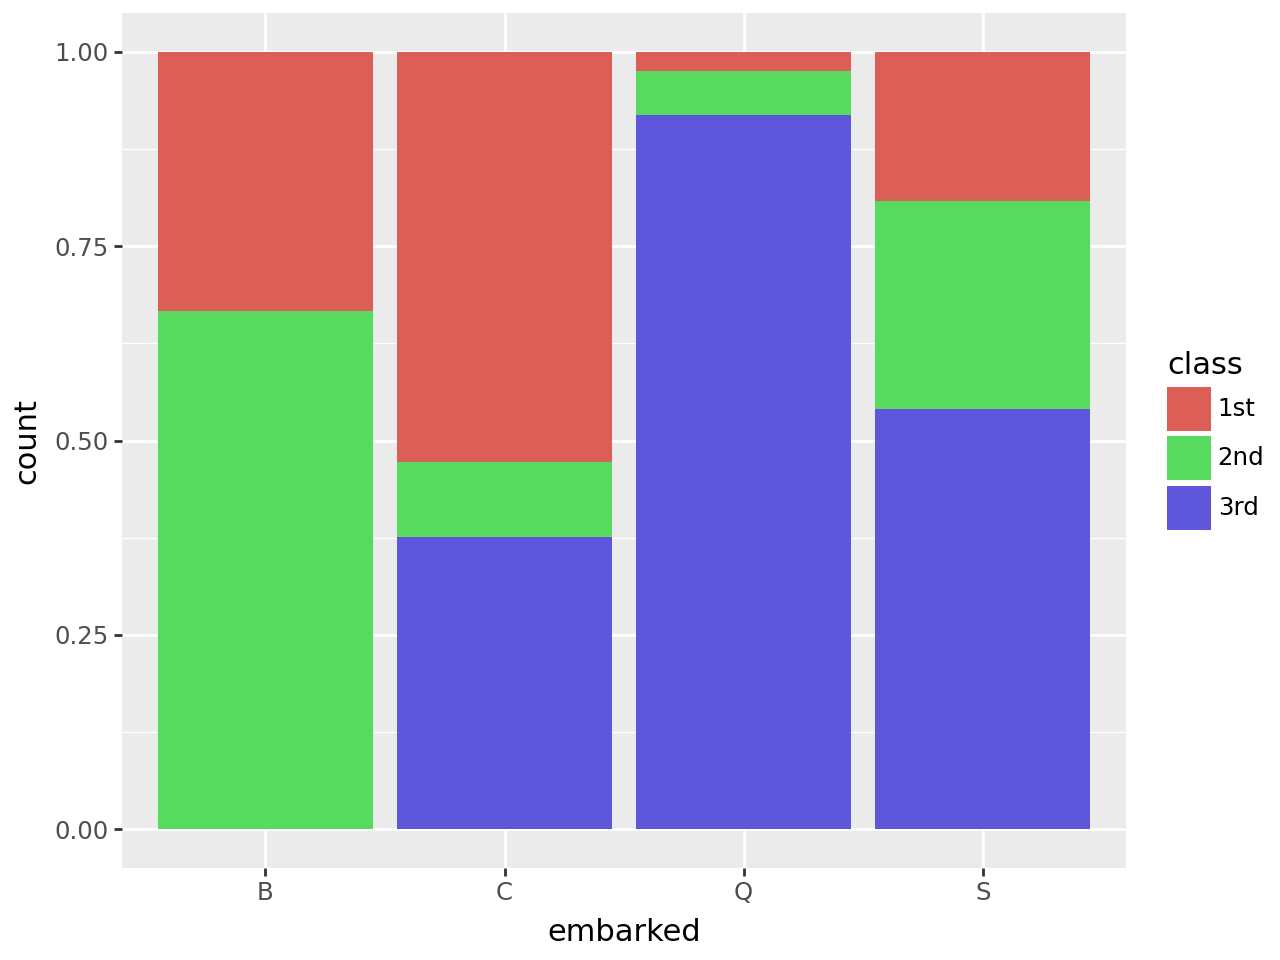

In [12]:
# Code here
from plotnine import ggplot, aes, geom_bar
(ggplot(df_titanic, aes(x = "embarked", fill = "class"))
    + geom_bar(position = "fill")
)